# Forecasting with Prophet 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from itertools import product
from prophet import Prophet
import matplotlib.pyplot as plt

from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
df = sm.datasets.co2.load_pandas().data
df = df.interpolate()

df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


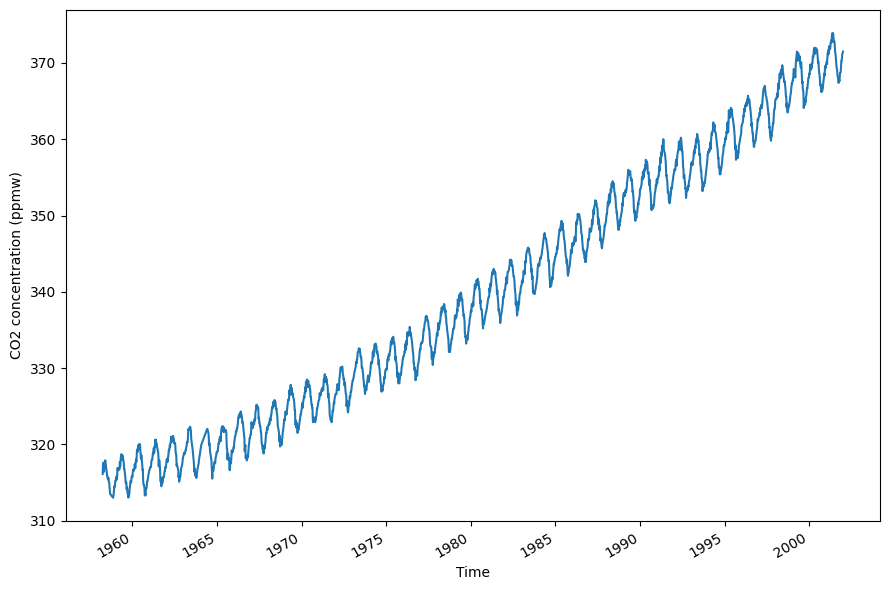

In [4]:
fig, ax = plt.subplots()

ax.plot(df['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 concentration (ppmw)')

fig.autofmt_xdate()
plt.tight_layout()

## Format data for Prophet 

In [5]:
# Format data
df = df.reset_index()
df.head()

,index,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [6]:
# rename cols
df.columns = ['ds', 'y']
df.head(2)

,ds,y
0,1958-03-29,316.1
1,1958-04-05,317.3


In [9]:
df.tail()

,ds,y
2279,2001-12-01,370.3
2280,2001-12-08,370.8
2281,2001-12-15,371.2
2282,2001-12-22,371.3
2283,2001-12-29,371.5


## Hyperparameter tuning 

In [7]:
# Keep the last 104 time steps for the test set
train = df[:-104]
test = df[-104:]


In [12]:
train.tail()

,ds,y
2175,1999-12-04,367.4
2176,1999-12-11,368.0
2177,1999-12-18,368.0
2178,1999-12-25,368.2
2179,2000-01-01,368.6


In [14]:
# Define parma grid
param_grid = {
    'changepoint_prior_scale' : [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale' : [0.01, 0.1, 1.0, 10.0]
}

# Producct of all vals
params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

# container
mses = []

# Weekly data so need cutoffs
cutoffs = pd.date_range(start='1990-03-29', end='1999-01-01', freq='52W')

# iterate through
for param in params:

    # Model
    m = Prophet(**param)
    m.fit(train)

    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])

tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses
tuning_results

10:08:18 - cmdstanpy - INFO - Chain [1] start processing
10:08:19 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/9 [00:00<?, ?it/s]

10:08:19 - cmdstanpy - INFO - Chain [1] start processing
10:08:19 - cmdstanpy - INFO - Chain [1] done processing
10:08:19 - cmdstanpy - INFO - Chain [1] start processing
10:08:20 - cmdstanpy - INFO - Chain [1] done processing
10:08:20 - cmdstanpy - INFO - Chain [1] start processing
10:08:20 - cmdstanpy - INFO - Chain [1] done processing
10:08:20 - cmdstanpy - INFO - Chain [1] start processing
10:08:20 - cmdstanpy - INFO - Chain [1] done processing
10:08:20 - cmdstanpy - INFO - Chain [1] start processing
10:08:21 - cmdstanpy - INFO - Chain [1] done processing
10:08:21 - cmdstanpy - INFO - Chain [1] start processing
10:08:21 - cmdstanpy - INFO - Chain [1] done processing
10:08:21 - cmdstanpy - INFO - Chain [1] start processing
10:08:22 - cmdstanpy - INFO - Chain [1] done processing
10:08:22 - cmdstanpy - INFO - Chain [1] start processing
10:08:22 - cmdstanpy - INFO - Chain [1] done processing
10:08:22 - cmdstanpy - INFO - Chain [1] start processing
10:08:23 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:08:23 - cmdstanpy - INFO - Chain [1] start processing
10:08:23 - cmdstanpy - INFO - Chain [1] done processing
10:08:24 - cmdstanpy - INFO - Chain [1] start processing
10:08:24 - cmdstanpy - INFO - Chain [1] done processing
10:08:24 - cmdstanpy - INFO - Chain [1] start processing
10:08:24 - cmdstanpy - INFO - Chain [1] done processing
10:08:24 - cmdstanpy - INFO - Chain [1] start processing
10:08:25 - cmdstanpy - INFO - Chain [1] done processing
10:08:25 - cmdstanpy - INFO - Chain [1] start processing
10:08:25 - cmdstanpy - INFO - Chain [1] done processing
10:08:25 - cmdstanpy - INFO - Chain [1] start processing
10:08:25 - cmdstanpy - INFO - Chain [1] done processing
10:08:26 - cmdstanpy - INFO - Chain [1] start processing
10:08:26 - cmdstanpy - INFO - Chain [1] done processing
10:08:26 - cmdstanpy - INFO - Chain [1] start processing
10:08:26 - cmdstanpy - INFO - Chain [1] done processing
10:08:26 - cmdstanpy - INFO - Chain [1] start processing
10:08:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:08:27 - cmdstanpy - INFO - Chain [1] start processing
10:08:28 - cmdstanpy - INFO - Chain [1] done processing
10:08:28 - cmdstanpy - INFO - Chain [1] start processing
10:08:28 - cmdstanpy - INFO - Chain [1] done processing
10:08:28 - cmdstanpy - INFO - Chain [1] start processing
10:08:29 - cmdstanpy - INFO - Chain [1] done processing
10:08:29 - cmdstanpy - INFO - Chain [1] start processing
10:08:29 - cmdstanpy - INFO - Chain [1] done processing
10:08:29 - cmdstanpy - INFO - Chain [1] start processing
10:08:29 - cmdstanpy - INFO - Chain [1] done processing
10:08:29 - cmdstanpy - INFO - Chain [1] start processing
10:08:30 - cmdstanpy - INFO - Chain [1] done processing
10:08:30 - cmdstanpy - INFO - Chain [1] start processing
10:08:30 - cmdstanpy - INFO - Chain [1] done processing
10:08:30 - cmdstanpy - INFO - Chain [1] start processing
10:08:31 - cmdstanpy - INFO - Chain [1] done processing
10:08:31 - cmdstanpy - INFO - Chain [1] start processing
10:08:31 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:08:32 - cmdstanpy - INFO - Chain [1] start processing
10:08:32 - cmdstanpy - INFO - Chain [1] done processing
10:08:32 - cmdstanpy - INFO - Chain [1] start processing
10:08:33 - cmdstanpy - INFO - Chain [1] done processing
10:08:33 - cmdstanpy - INFO - Chain [1] start processing
10:08:33 - cmdstanpy - INFO - Chain [1] done processing
10:08:33 - cmdstanpy - INFO - Chain [1] start processing
10:08:33 - cmdstanpy - INFO - Chain [1] done processing
10:08:34 - cmdstanpy - INFO - Chain [1] start processing
10:08:34 - cmdstanpy - INFO - Chain [1] done processing
10:08:34 - cmdstanpy - INFO - Chain [1] start processing
10:08:34 - cmdstanpy - INFO - Chain [1] done processing
10:08:35 - cmdstanpy - INFO - Chain [1] start processing
10:08:35 - cmdstanpy - INFO - Chain [1] done processing
10:08:35 - cmdstanpy - INFO - Chain [1] start processing
10:08:35 - cmdstanpy - INFO - Chain [1] done processing
10:08:36 - cmdstanpy - INFO - Chain [1] start processing
10:08:36 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:08:37 - cmdstanpy - INFO - Chain [1] start processing
10:08:37 - cmdstanpy - INFO - Chain [1] done processing
10:08:37 - cmdstanpy - INFO - Chain [1] start processing
10:08:38 - cmdstanpy - INFO - Chain [1] done processing
10:08:38 - cmdstanpy - INFO - Chain [1] start processing
10:08:39 - cmdstanpy - INFO - Chain [1] done processing
10:08:39 - cmdstanpy - INFO - Chain [1] start processing
10:08:39 - cmdstanpy - INFO - Chain [1] done processing
10:08:39 - cmdstanpy - INFO - Chain [1] start processing
10:08:40 - cmdstanpy - INFO - Chain [1] done processing
10:08:40 - cmdstanpy - INFO - Chain [1] start processing
10:08:41 - cmdstanpy - INFO - Chain [1] done processing
10:08:41 - cmdstanpy - INFO - Chain [1] start processing
10:08:41 - cmdstanpy - INFO - Chain [1] done processing
10:08:41 - cmdstanpy - INFO - Chain [1] start processing
10:08:42 - cmdstanpy - INFO - Chain [1] done processing
10:08:42 - cmdstanpy - INFO - Chain [1] start processing
10:08:43 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:08:44 - cmdstanpy - INFO - Chain [1] start processing
10:08:45 - cmdstanpy - INFO - Chain [1] done processing
10:08:45 - cmdstanpy - INFO - Chain [1] start processing
10:08:45 - cmdstanpy - INFO - Chain [1] done processing
10:08:46 - cmdstanpy - INFO - Chain [1] start processing
10:08:46 - cmdstanpy - INFO - Chain [1] done processing
10:08:46 - cmdstanpy - INFO - Chain [1] start processing
10:08:47 - cmdstanpy - INFO - Chain [1] done processing
10:08:47 - cmdstanpy - INFO - Chain [1] start processing
10:08:48 - cmdstanpy - INFO - Chain [1] done processing
10:08:48 - cmdstanpy - INFO - Chain [1] start processing
10:08:49 - cmdstanpy - INFO - Chain [1] done processing
10:08:49 - cmdstanpy - INFO - Chain [1] start processing
10:08:49 - cmdstanpy - INFO - Chain [1] done processing
10:08:49 - cmdstanpy - INFO - Chain [1] start processing
10:08:50 - cmdstanpy - INFO - Chain [1] done processing
10:08:50 - cmdstanpy - INFO - Chain [1] start processing
10:08:51 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:08:52 - cmdstanpy - INFO - Chain [1] start processing
10:08:53 - cmdstanpy - INFO - Chain [1] done processing
10:08:53 - cmdstanpy - INFO - Chain [1] start processing
10:08:53 - cmdstanpy - INFO - Chain [1] done processing
10:08:53 - cmdstanpy - INFO - Chain [1] start processing
10:08:54 - cmdstanpy - INFO - Chain [1] done processing
10:08:54 - cmdstanpy - INFO - Chain [1] start processing
10:08:54 - cmdstanpy - INFO - Chain [1] done processing
10:08:55 - cmdstanpy - INFO - Chain [1] start processing
10:08:55 - cmdstanpy - INFO - Chain [1] done processing
10:08:55 - cmdstanpy - INFO - Chain [1] start processing
10:08:56 - cmdstanpy - INFO - Chain [1] done processing
10:08:56 - cmdstanpy - INFO - Chain [1] start processing
10:08:57 - cmdstanpy - INFO - Chain [1] done processing
10:08:57 - cmdstanpy - INFO - Chain [1] start processing
10:08:57 - cmdstanpy - INFO - Chain [1] done processing
10:08:57 - cmdstanpy - INFO - Chain [1] start processing
10:08:58 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:08:59 - cmdstanpy - INFO - Chain [1] start processing
10:08:59 - cmdstanpy - INFO - Chain [1] done processing
10:09:00 - cmdstanpy - INFO - Chain [1] start processing
10:09:00 - cmdstanpy - INFO - Chain [1] done processing
10:09:00 - cmdstanpy - INFO - Chain [1] start processing
10:09:01 - cmdstanpy - INFO - Chain [1] done processing
10:09:01 - cmdstanpy - INFO - Chain [1] start processing
10:09:01 - cmdstanpy - INFO - Chain [1] done processing
10:09:01 - cmdstanpy - INFO - Chain [1] start processing
10:09:02 - cmdstanpy - INFO - Chain [1] done processing
10:09:02 - cmdstanpy - INFO - Chain [1] start processing
10:09:03 - cmdstanpy - INFO - Chain [1] done processing
10:09:03 - cmdstanpy - INFO - Chain [1] start processing
10:09:04 - cmdstanpy - INFO - Chain [1] done processing
10:09:04 - cmdstanpy - INFO - Chain [1] start processing
10:09:04 - cmdstanpy - INFO - Chain [1] done processing
10:09:05 - cmdstanpy - INFO - Chain [1] start processing
10:09:05 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:09:06 - cmdstanpy - INFO - Chain [1] start processing
10:09:07 - cmdstanpy - INFO - Chain [1] done processing
10:09:07 - cmdstanpy - INFO - Chain [1] start processing
10:09:07 - cmdstanpy - INFO - Chain [1] done processing
10:09:07 - cmdstanpy - INFO - Chain [1] start processing
10:09:08 - cmdstanpy - INFO - Chain [1] done processing
10:09:08 - cmdstanpy - INFO - Chain [1] start processing
10:09:09 - cmdstanpy - INFO - Chain [1] done processing
10:09:09 - cmdstanpy - INFO - Chain [1] start processing
10:09:09 - cmdstanpy - INFO - Chain [1] done processing
10:09:10 - cmdstanpy - INFO - Chain [1] start processing
10:09:10 - cmdstanpy - INFO - Chain [1] done processing
10:09:10 - cmdstanpy - INFO - Chain [1] start processing
10:09:11 - cmdstanpy - INFO - Chain [1] done processing
10:09:11 - cmdstanpy - INFO - Chain [1] start processing
10:09:12 - cmdstanpy - INFO - Chain [1] done processing
10:09:12 - cmdstanpy - INFO - Chain [1] start processing
10:09:12 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:09:13 - cmdstanpy - INFO - Chain [1] start processing
10:09:14 - cmdstanpy - INFO - Chain [1] done processing
10:09:14 - cmdstanpy - INFO - Chain [1] start processing
10:09:15 - cmdstanpy - INFO - Chain [1] done processing
10:09:15 - cmdstanpy - INFO - Chain [1] start processing
10:09:15 - cmdstanpy - INFO - Chain [1] done processing
10:09:15 - cmdstanpy - INFO - Chain [1] start processing
10:09:16 - cmdstanpy - INFO - Chain [1] done processing
10:09:16 - cmdstanpy - INFO - Chain [1] start processing
10:09:16 - cmdstanpy - INFO - Chain [1] done processing
10:09:17 - cmdstanpy - INFO - Chain [1] start processing
10:09:17 - cmdstanpy - INFO - Chain [1] done processing
10:09:17 - cmdstanpy - INFO - Chain [1] start processing
10:09:18 - cmdstanpy - INFO - Chain [1] done processing
10:09:18 - cmdstanpy - INFO - Chain [1] start processing
10:09:19 - cmdstanpy - INFO - Chain [1] done processing
10:09:19 - cmdstanpy - INFO - Chain [1] start processing
10:09:19 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:09:20 - cmdstanpy - INFO - Chain [1] start processing
10:09:21 - cmdstanpy - INFO - Chain [1] done processing
10:09:21 - cmdstanpy - INFO - Chain [1] start processing
10:09:22 - cmdstanpy - INFO - Chain [1] done processing
10:09:22 - cmdstanpy - INFO - Chain [1] start processing
10:09:22 - cmdstanpy - INFO - Chain [1] done processing
10:09:22 - cmdstanpy - INFO - Chain [1] start processing
10:09:23 - cmdstanpy - INFO - Chain [1] done processing
10:09:23 - cmdstanpy - INFO - Chain [1] start processing
10:09:23 - cmdstanpy - INFO - Chain [1] done processing
10:09:24 - cmdstanpy - INFO - Chain [1] start processing
10:09:24 - cmdstanpy - INFO - Chain [1] done processing
10:09:24 - cmdstanpy - INFO - Chain [1] start processing
10:09:25 - cmdstanpy - INFO - Chain [1] done processing
10:09:25 - cmdstanpy - INFO - Chain [1] start processing
10:09:26 - cmdstanpy - INFO - Chain [1] done processing
10:09:26 - cmdstanpy - INFO - Chain [1] start processing
10:09:27 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:09:28 - cmdstanpy - INFO - Chain [1] start processing
10:09:28 - cmdstanpy - INFO - Chain [1] done processing
10:09:28 - cmdstanpy - INFO - Chain [1] start processing
10:09:29 - cmdstanpy - INFO - Chain [1] done processing
10:09:29 - cmdstanpy - INFO - Chain [1] start processing
10:09:29 - cmdstanpy - INFO - Chain [1] done processing
10:09:30 - cmdstanpy - INFO - Chain [1] start processing
10:09:30 - cmdstanpy - INFO - Chain [1] done processing
10:09:30 - cmdstanpy - INFO - Chain [1] start processing
10:09:31 - cmdstanpy - INFO - Chain [1] done processing
10:09:31 - cmdstanpy - INFO - Chain [1] start processing
10:09:31 - cmdstanpy - INFO - Chain [1] done processing
10:09:32 - cmdstanpy - INFO - Chain [1] start processing
10:09:32 - cmdstanpy - INFO - Chain [1] done processing
10:09:32 - cmdstanpy - INFO - Chain [1] start processing
10:09:33 - cmdstanpy - INFO - Chain [1] done processing
10:09:33 - cmdstanpy - INFO - Chain [1] start processing
10:09:34 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:09:35 - cmdstanpy - INFO - Chain [1] start processing
10:09:35 - cmdstanpy - INFO - Chain [1] done processing
10:09:36 - cmdstanpy - INFO - Chain [1] start processing
10:09:36 - cmdstanpy - INFO - Chain [1] done processing
10:09:36 - cmdstanpy - INFO - Chain [1] start processing
10:09:37 - cmdstanpy - INFO - Chain [1] done processing
10:09:37 - cmdstanpy - INFO - Chain [1] start processing
10:09:37 - cmdstanpy - INFO - Chain [1] done processing
10:09:38 - cmdstanpy - INFO - Chain [1] start processing
10:09:38 - cmdstanpy - INFO - Chain [1] done processing
10:09:38 - cmdstanpy - INFO - Chain [1] start processing
10:09:39 - cmdstanpy - INFO - Chain [1] done processing
10:09:39 - cmdstanpy - INFO - Chain [1] start processing
10:09:40 - cmdstanpy - INFO - Chain [1] done processing
10:09:40 - cmdstanpy - INFO - Chain [1] start processing
10:09:40 - cmdstanpy - INFO - Chain [1] done processing
10:09:41 - cmdstanpy - INFO - Chain [1] start processing
10:09:41 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:09:42 - cmdstanpy - INFO - Chain [1] start processing
10:09:43 - cmdstanpy - INFO - Chain [1] done processing
10:09:43 - cmdstanpy - INFO - Chain [1] start processing
10:09:43 - cmdstanpy - INFO - Chain [1] done processing
10:09:44 - cmdstanpy - INFO - Chain [1] start processing
10:09:44 - cmdstanpy - INFO - Chain [1] done processing
10:09:44 - cmdstanpy - INFO - Chain [1] start processing
10:09:45 - cmdstanpy - INFO - Chain [1] done processing
10:09:45 - cmdstanpy - INFO - Chain [1] start processing
10:09:45 - cmdstanpy - INFO - Chain [1] done processing
10:09:46 - cmdstanpy - INFO - Chain [1] start processing
10:09:46 - cmdstanpy - INFO - Chain [1] done processing
10:09:46 - cmdstanpy - INFO - Chain [1] start processing
10:09:47 - cmdstanpy - INFO - Chain [1] done processing
10:09:47 - cmdstanpy - INFO - Chain [1] start processing
10:09:48 - cmdstanpy - INFO - Chain [1] done processing
10:09:48 - cmdstanpy - INFO - Chain [1] start processing
10:09:48 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:09:49 - cmdstanpy - INFO - Chain [1] start processing
10:09:50 - cmdstanpy - INFO - Chain [1] done processing
10:09:50 - cmdstanpy - INFO - Chain [1] start processing
10:09:51 - cmdstanpy - INFO - Chain [1] done processing
10:09:51 - cmdstanpy - INFO - Chain [1] start processing
10:09:51 - cmdstanpy - INFO - Chain [1] done processing
10:09:52 - cmdstanpy - INFO - Chain [1] start processing
10:09:52 - cmdstanpy - INFO - Chain [1] done processing
10:09:52 - cmdstanpy - INFO - Chain [1] start processing
10:09:53 - cmdstanpy - INFO - Chain [1] done processing
10:09:53 - cmdstanpy - INFO - Chain [1] start processing
10:09:53 - cmdstanpy - INFO - Chain [1] done processing
10:09:54 - cmdstanpy - INFO - Chain [1] start processing
10:09:54 - cmdstanpy - INFO - Chain [1] done processing
10:09:54 - cmdstanpy - INFO - Chain [1] start processing
10:09:55 - cmdstanpy - INFO - Chain [1] done processing
10:09:55 - cmdstanpy - INFO - Chain [1] start processing
10:09:56 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/9 [00:00<?, ?it/s]

10:09:57 - cmdstanpy - INFO - Chain [1] start processing
10:09:57 - cmdstanpy - INFO - Chain [1] done processing
10:09:57 - cmdstanpy - INFO - Chain [1] start processing
10:09:58 - cmdstanpy - INFO - Chain [1] done processing
10:09:58 - cmdstanpy - INFO - Chain [1] start processing
10:09:59 - cmdstanpy - INFO - Chain [1] done processing
10:09:59 - cmdstanpy - INFO - Chain [1] start processing
10:09:59 - cmdstanpy - INFO - Chain [1] done processing
10:09:59 - cmdstanpy - INFO - Chain [1] start processing
10:10:00 - cmdstanpy - INFO - Chain [1] done processing
10:10:00 - cmdstanpy - INFO - Chain [1] start processing
10:10:01 - cmdstanpy - INFO - Chain [1] done processing
10:10:01 - cmdstanpy - INFO - Chain [1] start processing
10:10:02 - cmdstanpy - INFO - Chain [1] done processing
10:10:02 - cmdstanpy - INFO - Chain [1] start processing
10:10:03 - cmdstanpy - INFO - Chain [1] done processing
10:10:03 - cmdstanpy - INFO - Chain [1] start processing
10:10:03 - cmdstanpy - INFO - Chain [1]

,changepoint_prior_scale,seasonality_prior_scale,mse
0,0.001,0.01,1.270039
1,0.001,0.10,1.277159
2,0.001,1.00,1.269823
3,0.001,10.00,1.269278
4,0.010,0.01,1.372105
5,0.010,0.10,1.369545
6,0.010,1.00,1.372735
7,0.010,10.00,1.370322
8,0.100,0.01,1.373805
9,0.100,0.10,1.376199


In [15]:
# Get best params
best_params = params[np.argmin(mses)]

print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}


In [16]:
tuning_results.sort_values('mse').head()

,changepoint_prior_scale,seasonality_prior_scale,mse
3,0.001,10.00,1.269278
2,0.001,1.00,1.269823
0,0.001,0.01,1.270039
1,0.001,0.10,1.277159
5,0.010,0.10,1.369545


## Rolling forecast 

In [17]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon

    if method == 'prophet':
        # Get the predictions from Prophet
        pred_prophet = []

        for i in range(train_len, total_len, window):

            m = Prophet(**best_params)
            m.fit(df[:i])
            future = m.make_future_dataframe(periods=52, freq='W')
            forecast = m.predict(future)
            pred_prophet.extend(forecast[-52:]['yhat'].values)
            
        return pred_prophet

In [18]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 52

pred_prophet = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'prophet')

test = test.copy()

test.loc[:, 'pred_prophet'] = pred_prophet

test.head()

10:13:48 - cmdstanpy - INFO - Chain [1] start processing
10:13:48 - cmdstanpy - INFO - Chain [1] done processing
10:13:49 - cmdstanpy - INFO - Chain [1] start processing
10:13:49 - cmdstanpy - INFO - Chain [1] done processing


,ds,y,pred_prophet
2180,2000-01-08,368.5,367.871866
2181,2000-01-15,369.0,368.097507
2182,2000-01-22,369.8,368.278456
2183,2000-01-29,369.2,368.440434
2184,2000-02-05,369.1,368.616619


## Evaluation 

In [19]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [20]:
mape_prophet = mape(test['y'], test['pred_prophet'])

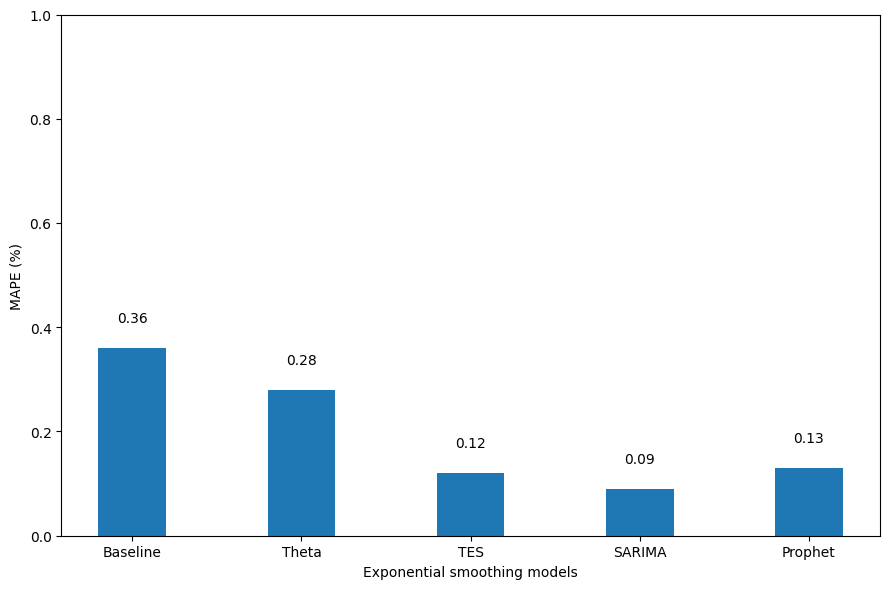

In [21]:
fig, ax = plt.subplots()

x = ['Baseline', 'Theta', 'TES', 'SARIMA', 'Prophet']
y = [0.36, 0.28, 0.12, 0.09, mape_prophet]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Exponential smoothing models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 1)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()